In [67]:
import os
os.chdir("..\..")
# from google.colab import drive 
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/neural-processes-main
import torch
import numpy as np
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from ConvCNP_2d import GridConvCNP
from train_cnp import train_2d
import matplotlib.pyplot as plt#
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [80]:
trainset_mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([transforms.Resize(32), transforms.ToTensor()]))
test_mnist = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([transforms.Resize(32), transforms.ToTensor()]))


100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [81]:
train_mnist, val_mnist = torch.utils.data.random_split(trainset_mnist, [54000, 6000], generator=torch.Generator().manual_seed(1))

In [82]:
train_mnist_loader = DataLoader(dataset=train_mnist, shuffle=True, batch_size=32)
val_mnist_loader = DataLoader(dataset=val_mnist, shuffle=False, batch_size=32)
test_mnist_loader = DataLoader(dataset=test_mnist, shuffle=False, batch_size=32)


Using device: cuda
EPOCH 1:
  batch 100 loss: -0.41949067284353075
  batch 200 loss: -0.9569947864115238
  batch 300 loss: -1.515671231597662
  batch 400 loss: -1.507757057249546
  batch 500 loss: -1.8313532544672488
  batch 600 loss: -1.6550606615841388
  batch 700 loss: -1.939956991672516
  batch 800 loss: -1.9354034292697906
  batch 900 loss: -2.0550619733333586
  batch 1000 loss: -2.0652654469013214
  batch 1100 loss: -2.081205362677574
  batch 1200 loss: -2.1383792579174044
  batch 1300 loss: -2.0540052282810213
  batch 1400 loss: -2.179243450164795
  batch 1500 loss: -2.1790587386488913
  batch 1600 loss: -2.062986842393875
LOSS train -2.06299 valid -1.98017
EPOCH 2:
  batch 100 loss: -2.1360696509480475
  batch 200 loss: -2.2116644269227983
  batch 300 loss: -2.2287100088596343
  batch 400 loss: -2.2666750705242156
  batch 500 loss: -2.170761376619339
  batch 600 loss: -2.292190045118332
  batch 700 loss: -2.3099566638469695
  batch 800 loss: -2.2445927649736404
  batch 900 loss

<Figure size 432x288 with 0 Axes>

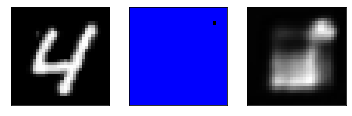

<Figure size 432x288 with 0 Axes>

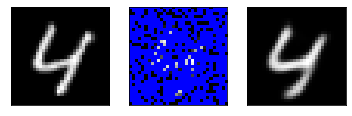

<Figure size 432x288 with 0 Axes>

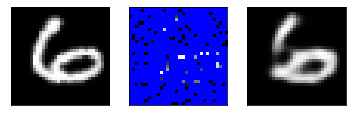

<Figure size 432x288 with 0 Axes>

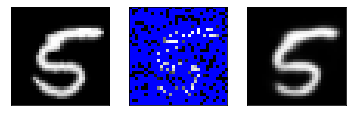

<Figure size 432x288 with 0 Axes>

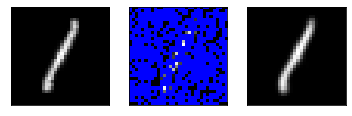

<Figure size 432x288 with 0 Axes>

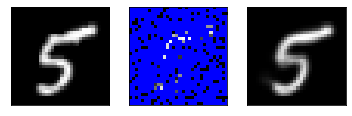

<Figure size 432x288 with 0 Axes>

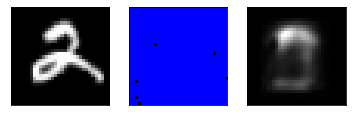

<Figure size 432x288 with 0 Axes>

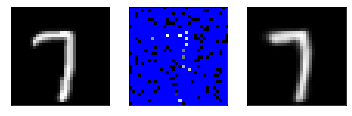

<Figure size 432x288 with 0 Axes>

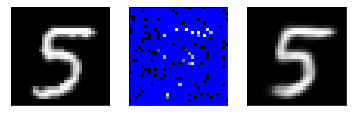

<Figure size 432x288 with 0 Axes>

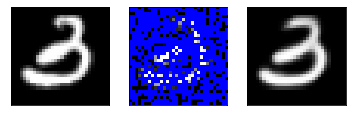

In [5]:
ConvCNP_mnist = GridConvCNP(1,1,11,9,5,2,128,4)
best_ConvCNP_mnist_path=train_2d(model = ConvCNP_mnist, model_name = "ConvCNP_2d_MNIST", train_loader=train_mnist_loader, 
                val_loader = val_mnist_loader, a = 0.0, b= 0.3, epochs=10, report_interval=100)

Using device: cuda
EPOCH 1:
  batch 200 loss: -0.5438099051592872
  batch 400 loss: -1.3818326879385858
  batch 600 loss: -1.7205805683089421
  batch 800 loss: -2.298012656029314
  batch 1000 loss: -2.5028848522529006
  batch 1200 loss: -2.5504449613392355
  batch 1400 loss: -2.6402886040881275
  batch 1600 loss: -2.541879309671931
  batch 1800 loss: -2.7128253219183533
  batch 2000 loss: -2.5956621731817724
  batch 2200 loss: -2.8123106511402876
  batch 2400 loss: -2.8665807801112533
LOSS train -2.86658 valid -2.51195
EPOCH 2:
  batch 200 loss: -2.8456504148989916
  batch 400 loss: -2.957161909460556
  batch 600 loss: -2.8651042262092234
  batch 800 loss: -3.1712471977621317
  batch 1000 loss: -3.0964223900064827
  batch 1200 loss: -3.1616953113675117
  batch 1400 loss: -3.166201181970537
  batch 1600 loss: -3.2896549937222153
  batch 1800 loss: -3.088361888770014
  batch 2000 loss: -3.3071310988254847
  batch 2200 loss: -3.222052410207689
  batch 2400 loss: -3.200464257467538
LOSS tr

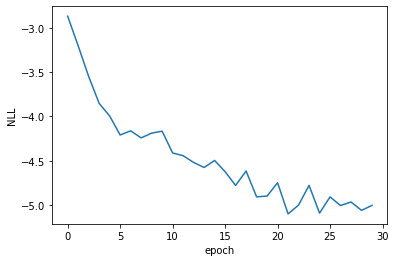

In [3]:
train_celeba = datasets.CelebA(root='./data', split="train", download=False, transform=transforms.Compose([transforms.Resize([32,32]), 
                                                       transforms.ToTensor()]))

val_celeba = datasets.CelebA(root='./data', split="valid", download=False, transform=transforms.Compose([transforms.Resize([32,32]), 
                                                       transforms.ToTensor()]))

test_celeba = datasets.CelebA(root='./data', split="test", download=False, transform=transforms.Compose([transforms.Resize([32,32]), 
                                                       transforms.ToTensor()]))
train_celeba_loader = DataLoader(dataset=train_celeba, shuffle=True, batch_size=64)
val_celeba_loader = DataLoader(dataset=val_celeba, shuffle=False, batch_size=64)
test_celeba_loader = DataLoader(dataset=test_celeba, shuffle=False, batch_size=64)

ConvCNP_celeba = GridConvCNP(1,3,11,9,5,2,128,4)
best_ConvCNP_celeba_path=train_2d(model = ConvCNP_celeba,  train_loader=train_celeba_loader, 
                val_loader = val_celeba_loader, a = 0.0, b= 0.3, epochs=30, report_interval=200)

tensor(False)
torch.Size([1, 3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


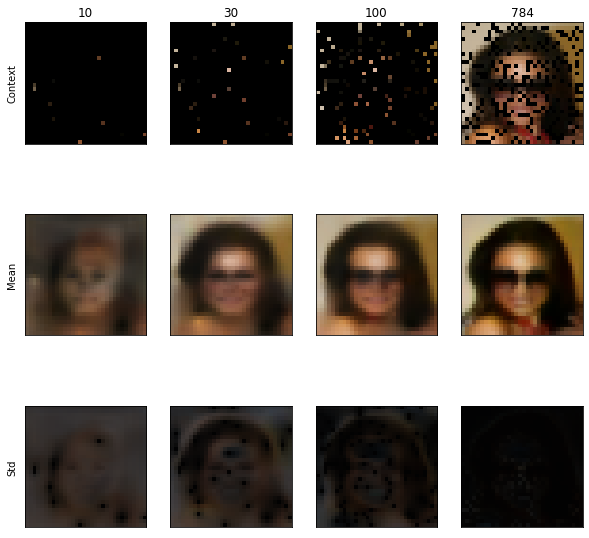

In [95]:
from data.mask_generator import GetBatchMask
ConvCNP_celeba.eval()
masker_10 = GetBatchMask(a=10, b=10)
masker_30 = GetBatchMask(a=30, b=30)
masker_100 = GetBatchMask(a=100, b=100)
masker_784 = GetBatchMask(a=784, b=784)
mask_10 = masker_10(1,(32,32), is_same_mask=True)
mask_30 = masker_30(1,(32,32), is_same_mask=True)
mask_100 = masker_100(1,(32,32), is_same_mask=True)
mask_784 = masker_784(1,(32,32), is_same_mask=True)

single_img = test_celeba[2903][0].unsqueeze(0)



with torch.no_grad():
    mean_10, std_10,_ =  ConvCNP_celeba(single_img.to(device), mask_10.to(device))
    mean_30, std_30,_ =  ConvCNP_celeba(single_img.to(device), mask_30.to(device))
    mean_100, std_100,_ =  ConvCNP_celeba(single_img.to(device), mask_100.to(device))
    mean_784, std_784,_ =  ConvCNP_celeba(single_img.to(device), mask_784.to(device))
    mean_10, std_10 = mean_10.detach().cpu(), std_10.detach().cpu()
    mean_30, std_30 = mean_30.detach().cpu(), std_30.detach().cpu()
    mean_100, std_100 = mean_100.detach().cpu(), std_100.detach().cpu()
    mean_784, std_784 = mean_784.detach().cpu(), std_784.detach().cpu()
    
    print((mean_100>1).any())
    
    masked_10 = single_img.clone()
    masked_10[(mask_10.expand_as(masked_10))==0.0] = np.NaN
    print(masked_10.shape)
    masked_30 = single_img.clone()
    masked_30[(mask_30.expand_as(masked_30))==0.0] = np.NaN
    masked_100 = single_img.clone()
    masked_100[(mask_100.expand_as(masked_100))==0.0] = np.NaN
    masked_784 = single_img.clone()
    masked_784[(mask_784.expand_as(masked_784))==0.0] = np.NaN
    f, axe = plt.subplots(3,4,figsize=(10,10))
    axe[0,0].imshow(masked_10.permute(0,2,3,1).squeeze(0))
    axe[0,0].xaxis.set_tick_params(labelbottom=False)
    axe[0,0].yaxis.set_tick_params(labelleft=False)
    axe[0,0].set_xticks([])
    axe[0,0].set_yticks([])
    axe[0,0].patch.set_facecolor('black')
    axe[0,0].set_title("10")
    axe[0,0].set_ylabel("Context")
    axe[0,1].imshow(masked_30.permute(0,2,3,1).squeeze(0))
    axe[0,1].xaxis.set_tick_params(labelbottom=False)
    axe[0,1].yaxis.set_tick_params(labelleft=False)
    axe[0,1].set_xticks([])
    axe[0,1].set_yticks([])
    axe[0,1].patch.set_facecolor('black')
    axe[0,1].set_title("30")
    axe[0,2].imshow(masked_100.permute(0,2,3,1).squeeze(0))
    axe[0,2].xaxis.set_tick_params(labelbottom=False)
    axe[0,2].yaxis.set_tick_params(labelleft=False)
    axe[0,2].set_xticks([])
    axe[0,2].set_yticks([])
    axe[0,2].patch.set_facecolor('black')
    axe[0,2].set_title("100")
    axe[0,3].imshow(masked_784.permute(0,2,3,1).squeeze(0))
    axe[0,3].xaxis.set_tick_params(labelbottom=False)
    axe[0,3].yaxis.set_tick_params(labelleft=False)
    axe[0,3].set_xticks([])
    axe[0,3].set_yticks([])
    axe[0,3].patch.set_facecolor('black')
    axe[0,3].set_title("784")
    axe[1,0].imshow(mean_10.squeeze(0))
    axe[1,0].xaxis.set_tick_params(labelbottom=False)
    axe[1,0].yaxis.set_tick_params(labelleft=False)
    axe[1,0].set_xticks([])
    axe[1,0].set_yticks([])
    axe[1,0].set_ylabel("Mean")
    axe[1,1].imshow(mean_30.squeeze(0))
    axe[1,1].xaxis.set_tick_params(labelbottom=False)
    axe[1,1].yaxis.set_tick_params(labelleft=False)
    axe[1,1].set_xticks([])
    axe[1,1].set_yticks([])
    axe[1,2].imshow(mean_100.squeeze(0))
    axe[1,2].xaxis.set_tick_params(labelbottom=False)
    axe[1,2].yaxis.set_tick_params(labelleft=False)
    axe[1,2].set_xticks([])
    axe[1,2].set_yticks([])
    axe[1,3].imshow(mean_784.squeeze(0))
    axe[1,3].xaxis.set_tick_params(labelbottom=False)
    axe[1,3].yaxis.set_tick_params(labelleft=False)
    axe[1,3].set_xticks([])
    axe[1,3].set_yticks([])
    axe[2,0].imshow((std_10.squeeze(0)))
    axe[2,0].xaxis.set_tick_params(labelbottom=False)
    axe[2,0].yaxis.set_tick_params(labelleft=False)
    axe[2,0].set_xticks([])
    axe[2,0].set_yticks([])
    axe[2,0].set_ylabel("Std")
    axe[2,1].imshow((std_30.squeeze(0)))
    axe[2,1].xaxis.set_tick_params(labelbottom=False)
    axe[2,1].yaxis.set_tick_params(labelleft=False)
    axe[2,1].set_xticks([])
    axe[2,1].set_yticks([])
    axe[2,2].imshow((std_100.squeeze(0)))
    axe[2,2].xaxis.set_tick_params(labelbottom=False)
    axe[2,2].yaxis.set_tick_params(labelleft=False)
    axe[2,2].set_xticks([])
    axe[2,2].set_yticks([])
    axe[2,3].imshow((std_784.squeeze(0)))
    axe[2,3].xaxis.set_tick_params(labelbottom=False)
    axe[2,3].yaxis.set_tick_params(labelleft=False)
    axe[2,3].set_xticks([])
    axe[2,3].set_yticks([])
    
    



tensor(False)
torch.Size([1, 1, 32, 32])


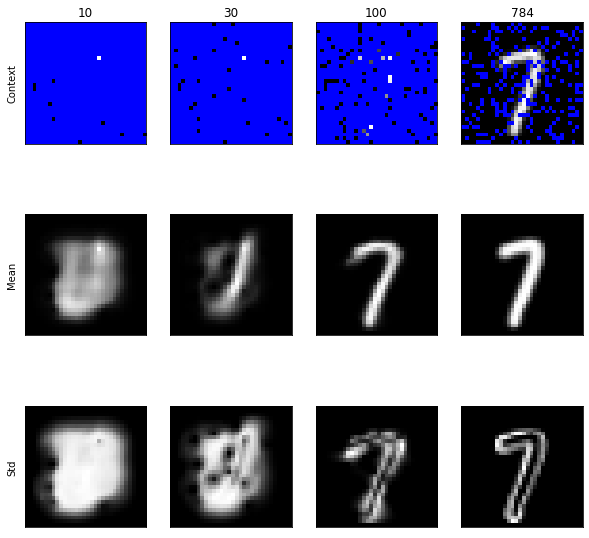

In [112]:
ConvCNP_mnist = GridConvCNP(1,1,11,9,5,2,128,4)
ConvCNP_mnist.load_state_dict(torch.load("checkpoint/GridConvCNP_MNIST/model_30_GridConvCNP_MNIST"))
ConvCNP_mnist.to(device)
ConvCNP_mnist.eval()
masker_10 = GetBatchMask(a=10, b=10)
masker_30 = GetBatchMask(a=30, b=30)
masker_100 = GetBatchMask(a=100, b=100)
masker_784 = GetBatchMask(a=784, b=784)
mask_10 = masker_10(1,(32,32), is_same_mask=True)
mask_30 = masker_30(1,(32,32), is_same_mask=True)
mask_100 = masker_100(1,(32,32), is_same_mask=True)
mask_784 = masker_784(1,(32,32), is_same_mask=True)

single_img = test_mnist[1507][0].unsqueeze(0)



with torch.no_grad():
    mean_10, std_10,_ =  ConvCNP_mnist(single_img.to(device), mask_10.to(device))
    mean_30, std_30,_ =  ConvCNP_mnist(single_img.to(device), mask_30.to(device))
    mean_100, std_100,_ =  ConvCNP_mnist(single_img.to(device), mask_100.to(device))
    mean_784, std_784,_ =  ConvCNP_mnist(single_img.to(device), mask_784.to(device))
    mean_10, std_10 = mean_10.detach().cpu(), std_10.detach().cpu()
    mean_30, std_30 = mean_30.detach().cpu(), std_30.detach().cpu()
    mean_100, std_100 = mean_100.detach().cpu(), std_100.detach().cpu()
    mean_784, std_784 = mean_784.detach().cpu(), std_784.detach().cpu()
    
    print((mean_100>1).any())
    
    masked_10 = single_img.clone()
    masked_10[(mask_10.expand_as(masked_10))==0.0] = np.NaN
    print(masked_10.shape)
    masked_30 = single_img.clone()
    masked_30[(mask_30.expand_as(masked_30))==0.0] = np.NaN
    masked_100 = single_img.clone()
    masked_100[(mask_100.expand_as(masked_100))==0.0] = np.NaN
    masked_784 = single_img.clone()
    masked_784[(mask_784.expand_as(masked_784))==0.0] = np.NaN
    f, axe = plt.subplots(3,4,figsize=(10,10))
    axe[0,0].imshow(masked_10.permute(0,2,3,1).squeeze(0), cmap="gray")
    axe[0,0].xaxis.set_tick_params(labelbottom=False)
    axe[0,0].yaxis.set_tick_params(labelleft=False)
    axe[0,0].set_xticks([])
    axe[0,0].set_yticks([])
    axe[0,0].patch.set_facecolor('blue')
    axe[0,0].set_title("10")
    axe[0,0].set_ylabel("Context")
    axe[0,1].imshow(masked_30.permute(0,2,3,1).squeeze(0), cmap="gray")
    axe[0,1].xaxis.set_tick_params(labelbottom=False)
    axe[0,1].yaxis.set_tick_params(labelleft=False)
    axe[0,1].set_xticks([])
    axe[0,1].set_yticks([])
    axe[0,1].patch.set_facecolor('blue')
    axe[0,1].set_title("30")
    axe[0,2].imshow(masked_100.permute(0,2,3,1).squeeze(0) , cmap="gray")
    axe[0,2].xaxis.set_tick_params(labelbottom=False)
    axe[0,2].yaxis.set_tick_params(labelleft=False)
    axe[0,2].set_xticks([])
    axe[0,2].set_yticks([])
    axe[0,2].patch.set_facecolor('blue')
    axe[0,2].set_title("100")
    axe[0,3].imshow(masked_784.permute(0,2,3,1).squeeze(0), cmap="gray")
    axe[0,3].xaxis.set_tick_params(labelbottom=False)
    axe[0,3].yaxis.set_tick_params(labelleft=False)
    axe[0,3].set_xticks([])
    axe[0,3].set_yticks([])
    axe[0,3].patch.set_facecolor('blue')
    axe[0,3].set_title("784")
    axe[1,0].imshow(mean_10.squeeze(0), cmap="gray")
    axe[1,0].xaxis.set_tick_params(labelbottom=False)
    axe[1,0].yaxis.set_tick_params(labelleft=False)
    axe[1,0].set_xticks([])
    axe[1,0].set_yticks([])
    axe[1,0].set_ylabel("Mean")
    axe[1,1].imshow(mean_30.squeeze(0), cmap="gray")
    axe[1,1].xaxis.set_tick_params(labelbottom=False)
    axe[1,1].yaxis.set_tick_params(labelleft=False)
    axe[1,1].set_xticks([])
    axe[1,1].set_yticks([])
    axe[1,2].imshow(mean_100.squeeze(0), cmap="gray")
    axe[1,2].xaxis.set_tick_params(labelbottom=False)
    axe[1,2].yaxis.set_tick_params(labelleft=False)
    axe[1,2].set_xticks([])
    axe[1,2].set_yticks([])
    axe[1,3].imshow(mean_784.squeeze(0), cmap="gray")
    axe[1,3].xaxis.set_tick_params(labelbottom=False)
    axe[1,3].yaxis.set_tick_params(labelleft=False)
    axe[1,3].set_xticks([])
    axe[1,3].set_yticks([])
    axe[2,0].imshow((std_10.squeeze(0)), cmap="gray")
    axe[2,0].xaxis.set_tick_params(labelbottom=False)
    axe[2,0].yaxis.set_tick_params(labelleft=False)
    axe[2,0].set_xticks([])
    axe[2,0].set_yticks([])
    axe[2,0].set_ylabel("Std")
    axe[2,1].imshow((std_30.squeeze(0)), cmap="gray")
    axe[2,1].xaxis.set_tick_params(labelbottom=False)
    axe[2,1].yaxis.set_tick_params(labelleft=False)
    axe[2,1].set_xticks([])
    axe[2,1].set_yticks([])
    axe[2,2].imshow((std_100.squeeze(0)), cmap="gray")
    axe[2,2].xaxis.set_tick_params(labelbottom=False)
    axe[2,2].yaxis.set_tick_params(labelleft=False)
    axe[2,2].set_xticks([])
    axe[2,2].set_yticks([])
    axe[2,3].imshow((std_784.squeeze(0)), cmap="gray")
    axe[2,3].xaxis.set_tick_params(labelbottom=False)
    axe[2,3].yaxis.set_tick_params(labelleft=False)
    axe[2,3].set_xticks([])
    axe[2,3].set_yticks([])
    